# Data analysis for assignment 2

## Import packages

For this analysis, we need pandas for data manipulation and seaborn for plotting. Matplotlib is sometimes useful in tandem with seaborn because it exposes some lower-level plotting functions.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [21]:
results_combined_parallelism = pd.read_csv('./data/raw/results_combined_parallelism.tsv', sep = '\t')
results_combined_parallelism = results_combined_parallelism.replace('parallel_combined', 'Combined task and data parallelism')
results_combined_parallelism = results_combined_parallelism.replace('sequential_with_parallel_mergesort', 'Task parallelism')
results_combined_parallelism = results_combined_parallelism.replace('parallel', 'Data parallelism')
results_combined_parallelism = results_combined_parallelism.replace('sequential', 'No parallelism')

results_combined_parallelism = results_combined_parallelism.drop('idx', axis=1)

results_combined_parallelism

,version,outer,inner_min,inner_max,adr,time
0,Combined task and data parallelism,10,10,100000,random,0.027950
1,Combined task and data parallelism,100,10,100000,random,0.229908
2,Combined task and data parallelism,1000,10,100000,random,1.021398
3,Combined task and data parallelism,10000,10,100000,random,11.249870
4,Task parallelism,10,10,100000,random,0.049490
5,Task parallelism,100,10,100000,random,0.420147
6,Task parallelism,1000,10,100000,random,4.676773
7,Task parallelism,10000,10,100000,random,44.535080
8,No parallelism,10,10,100000,random,0.040002
9,No parallelism,100,10,100000,random,0.335013


In [22]:
results_scheduling = pd.read_csv('./data/raw/results_scheduling.tsv', sep = '\t')
results_scheduling = results_scheduling.replace('sequential', 'No parallelism')
results_scheduling = results_scheduling.replace('parallel_static', 'Static scheduling, chunk size 100')
results_scheduling = results_scheduling.replace('parallel_dynamic_small_chunk_size', 'Dynamic scheduling, chunk size 10')
results_scheduling = results_scheduling.replace('parallel_dynamic_medium_chunk_size', 'Dynamic scheduling, chunk size 50')
results_scheduling = results_scheduling.replace('parallel_dynamic_large_chunk_size', 'Dynamic scheduling, large chunk 100')
results_scheduling = results_scheduling.replace('parallel_guided_small_chunk_size', 'Guided scheduling, chunk size 10')
results_scheduling = results_scheduling.replace('parallel_guided_medium_chunk_size', 'Guided scheduling, chunk size 50')
results_scheduling = results_scheduling.replace('parallel_guided_large_chunk_size', 'Guided scheduling, chunk size 100')

results_scheduling = results_scheduling.drop('idx', axis=1)

results_scheduling

,version,outer,inner_min,inner_max,adr,time
0,No parallelism,10,10,100000,random,0.040002
1,No parallelism,100,10,100000,random,0.335013
2,No parallelism,1000,10,100000,random,3.434883
3,No parallelism,10000,10,100000,random,35.318140
4,"Static scheduling, chunk size 100",10,10,100000,random,0.046667
5,"Static scheduling, chunk size 100",100,10,100000,random,0.387454
6,"Static scheduling, chunk size 100",1000,10,100000,random,1.257789
7,"Static scheduling, chunk size 100",10000,10,100000,random,13.327090
8,"Dynamic scheduling, chunk size 10",10,10,100000,random,0.055130
9,"Dynamic scheduling, chunk size 10",100,10,100000,random,0.109063


In [23]:
results_input_size_small = pd.read_csv('./data/raw/results_input_size_small.tsv', sep = '\t')
results_input_size_medium = pd.read_csv('./data/raw/results_input_size_medium.tsv', sep = '\t')
results_input_size_large = pd.read_csv('./data/raw/results_input_size_large.tsv', sep = '\t')

results_input_size_small = results_input_size_small.drop('idx', axis=1)
results_input_size_medium = results_input_size_medium.drop('idx', axis=1)
results_input_size_large = results_input_size_large.drop('idx', axis=1)

results_input_size = pd.concat([
  results_input_size_small,
  results_input_size_medium,
  results_input_size_large
])

results_input_size

,version,outer,inner_min,inner_max,adr,time
0,parallel,10,9000,11000,random,0.007992
1,parallel,100,9000,11000,random,0.073797
2,parallel,1000,9000,11000,random,0.120168
3,parallel,10000,9000,11000,random,2.129536
0,parallel,10,1000,19000,random,0.008157
1,parallel,100,1000,19000,random,0.068663
2,parallel,1000,1000,19000,random,0.118426
3,parallel,10000,1000,19000,random,2.522174
0,parallel,10,10,19990,random,0.007700
1,parallel,100,10,19990,random,0.071370


In [24]:
results_extra = pd.read_csv('./data/raw/results_extra.tsv', sep = '\t')
results_extra = results_extra.replace('parallel_presorted', 'Pre-sorted')
results_extra = results_extra.replace('parallel_autovectorized', 'Autovectorized')

results_extra = results_extra.drop('idx', axis=1)

results_extra

,version,outer,inner_min,inner_max,adr,time
0,Pre-sorted,10,10,100000,random,0.044761
1,Pre-sorted,100,10,100000,random,0.388009
2,Pre-sorted,1000,10,100000,random,0.803732
3,Pre-sorted,10000,10,100000,random,9.134733
4,Autovectorized,10,10,100000,random,0.047156
5,Autovectorized,100,10,100000,random,0.392182
6,Autovectorized,1000,10,100000,random,0.716279
7,Autovectorized,10000,10,100000,random,11.170670


In [25]:
# Concatenate all of the separate input files
results = pd.concat([
  results_combined_parallelism,
  results_scheduling,
  results_input_size,
  results_extra
])

# Preview combined data
results

,version,outer,inner_min,inner_max,adr,time
0,Combined task and data parallelism,10,10,100000,random,0.027950
1,Combined task and data parallelism,100,10,100000,random,0.229908
2,Combined task and data parallelism,1000,10,100000,random,1.021398
3,Combined task and data parallelism,10000,10,100000,random,11.249870
4,Task parallelism,10,10,100000,random,0.049490
...,...,...,...,...,...,...
3,Pre-sorted,10000,10,100000,random,9.134733
4,Autovectorized,10,10,100000,random,0.047156
5,Autovectorized,100,10,100000,random,0.392182
6,Autovectorized,1000,10,100000,random,0.716279


In [26]:
sns.set_theme(style="whitegrid")

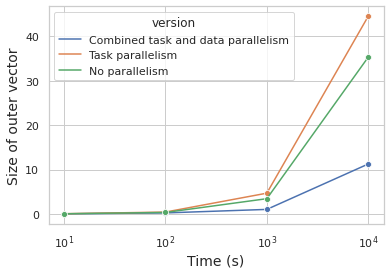

In [45]:
g = sns.lineplot(data = results_combined_parallelism, x = 'outer', y = 'time', hue = 'version', marker = 'o')
g.set_xlabel("Time (s)", fontsize = 14)
g.set_ylabel("Size of outer vector", fontsize = 14)
plt.xscale('log')
# plt.yscale('log')
plt.savefig('./data/graphs/combined_parallelism.pdf', dpi = 700)